In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Frame the Problem and Look at the Big Picture
=====================================

1. **Define the objective in business terms:** We have been hired by Magic Films for their new streaming service which provides access to a wide variety of movies. 
2. **How will your solution be used?** They want to eventually know what movies should be displayed and promoted on the homepage to attract users based on written reviews from viewers as well as what movies to remove from the website to save money on licensing fees.
3. **What solutions are in place?** For certain businesses such as the restaurant business, they try and identify certain keywords in reviews to find out what they are doing well and their customers like and what they can improve on.
4. **How should you frame this problem?** This is a supervised binary classification problem. Based on words and how they are used in a review we want to determine whether the review was `Positive` or `Negative`.
5. **How should performance be measured? Is the performance measure aligned with the business objective?** Because we are not to identify as many positives as we can by risking false positives and we are not trying to identify all the negatives we can, we believe we should use F1 score to find a middle ground. We want to reduce false positives and false negatives as equally as possible.
6. **What would be the minimum performance needed to reach the business objective?** We would like to get our score as close to 1.0 as possible. A goal is to get at least .85 or better.
7. **What are comparable problems? Can you reuse experience or tools?** We have had multi-classification experience with the MNIST data set for trying to decide what a number a written digit or what article of clothing something is. More importantly, we previously created a binary-classification model that would try to predict whether there would be an early spring or not. We would not be able to directly reuse this model in particular because we are trying to identify words within a review to determine if the review was positive or not.
8. **Is human expertise available?** We do not have anyone readily available but we are advised on the Readme to contact Andrew Maas, the organizer of the dataset, with any questions. We can also try and contact the user who uploaded the dataset to Kaggle.
9. **How would you solve the problem manually?** The manual approach would to be to parse up the reviews and try and filter out words with negative or positive connotations in order to decide whether a review is positive or negative. This could be a problem with sarcastic reviews and reviews with spelling errors or slang.
10. **List the assumptions you (or others) have made so far. Verify assumptions if possible.** We are assuming that the data set is all primarily english and has no spelling mistakes or errors in the reviews.

In [1]:
# Functions for loading and splitting data
def load_data(data):
    """Loads a dataset"""
    return pd.read_csv(data)


def split_labels(data, label_feature):
    """
    Split the given column of of the data, returning the full data set (without that
    feature) and the split off feature.
    """
    return data.drop(columns=label_feature), data[label_feature]

Get the Data
==========

1. **List the data you need and how much you need:** We have a dataset of IMDB movie reviews containing a combniation of positive and negative reviews for movies.
2. **Find and document where you can get that data:** We got the data from: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download
3. **Get access authorizations**: No authorization needed, the data is free to access on Kaggle.
4. **Create a workspace**: This notebook.
5. **Get the data**: Downloaded from Kaggle.
6. **Convert the data to a format you can easily manipulate**: Already in CSV files so easy to use.
7. **Ensure sensitive information is deleted or protected**: Data contains no sensitive information.
8. **Check the size and type of data (time series, geographical, …)**: This categorical data set contains reviews written in text as well as a binary attribute indicating whether the review was positive or not. It contains 50,000 unique values.

In [18]:
data = load_data('imdb_data.csv')

In [19]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [20]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [34]:
positives = data[data['sentiment']=='positive'].reset_index()
negatives = data[data['sentiment']=='negative'].reset_index()
len(positives), len(negatives)

(25000, 25000)

Half of the reviews in the data are positive and the other half is negative, so both types are equally represented. And it is also nice to know there are not any missing values, which is important with a dataset with two features.

In [35]:
positives.head(20)

,index,review,sentiment
0,0,One of the other reviewers has mentioned that ...,positive
1,1,A wonderful little production. <br /><br />The...,positive
2,2,I thought this was a wonderful way to spend ti...,positive
3,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,5,"Probably my all-time favorite movie, a story o...",positive
5,6,I sure would like to see a resurrection of a u...,positive
6,9,If you like original gut wrenching laughter yo...,positive
7,14,This a fantastic movie of three prisoners who ...,positive
8,16,Some films just simply should not be remade. T...,positive
9,18,"I remember this film,it was the first film i h...",positive


Below is a review on the short film `Spatula Madness` which gives us an idea of what a positive review might sound like.

In [36]:
positives['review'][42]

"This short film that inspired the soon-to-be full length feature - Spatula Madness - is a hilarious piece that contends against similar cartoons yielding multiple writers. The short film stars Edward the Spatula who after being fired from his job, joins in the fight against the evil spoons. This premise allows for some funny content near the beginning, but is barely present for the remainder of the feature. This film's 15-minute running time is absorbed by some odd-ball comedy and a small musical number. Unfortunately not much else lies below it. The plot that is set up doesn't really have time to show. But it's surely follows it plot better than many high-budget Hollywood films. This film is worth watching at least a few times. Take it for what it is, and don't expect a deep story."

Below is a review for a movie `War Inc` which gives us an idea of what a negative review might sound like.
It should be noted that there appear to be `HTML` elements peppered in some of the reviews. In this example we see a `<br />` tag.

In [40]:
negatives['review'][13]

'This film tried to be too many things all at once: stinging political satire, Hollywood blockbuster, sappy romantic comedy, family values promo... the list goes on and on. It failed miserably at all of them, but there was enough interest to keep me from turning it off until the end.<br /><br />Although I appreciate the spirit behind WAR, INC., it depresses me to see such a clumsy effort, especially when it will be taken by its targets to reflect the lack of the existence of a serious critique, rather than simply the poor writing, direction, and production of this particular film.<br /><br />There is a critique to be made about the corporatization of war. But poking fun at it in this way diminishes the true atrocity of what is happening. Reminds me a bit of THREE KINGS, which similarly trivializes a genuine cause for concern.'

To begin breaking down reviews and what words might entail a negative or positive review we might want to try and see what words are most popularly used...

In [42]:
pd.Series(' '.join(positives['review']).lower().split()).value_counts()[:100]

the      326268
and      171379
a        160990
of       150754
to       129608
          ...  
two        6515
don't      6251
made       6227
being      6218
make       6204
Length: 100, dtype: int64

But as expected, this approach will result in finding a lot of the words will be prepositions, determiners, conjuctions or very basic words found in speech.

This dataset only has 2 attributes which is not a lot by any means. We could try creating a new feature such as review length and see if there is any interesting patterns for negative and postitive review lengths.

In [48]:
positives['review_len'] = positives['review'].str.len()
len(positives['review'][0]), positives['review_len'][0]

(1761, 1761)

In [49]:
negatives['review_len'] = negatives['review'].str.len()
len(negatives['review'][0]), negatives['review_len'][0]

(748, 748)

In [50]:
positives.describe()

,index,review_len
count,25000.00000,25000.000000
mean,25034.92232,1324.797680
std,14406.02897,1031.492627
min,0.00000,65.000000
25%,12577.00000,691.000000
50%,25039.00000,968.000000
75%,37524.25000,1614.000000
max,49995.00000,13704.000000


In [51]:
negatives.describe()

,index,review_len
count,25000.000000,25000.000000
mean,24964.077680,1294.064360
std,14461.920812,945.892669
min,3.000000,32.000000
25%,12403.500000,706.000000
50%,24940.000000,973.000000
75%,37482.500000,1567.250000
max,49999.000000,8969.000000


Unfortunately there does not seem like any apparent differences between the two, which would be expected as length would almost always be normally distributed whether the review is positive or not.

<AxesSubplot:>

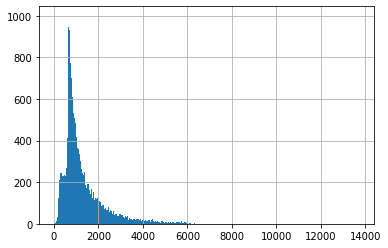

In [59]:
pd.concat([positives, negatives], axis=0)['review_len'].hist(bins=1000)